In [1]:
import time
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

from keybert import KeyBERT
from itertools import chain

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
d1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/causes4_1.csv", on_bad_lines = 'skip').reset_index()
d2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/causes4_2.csv", on_bad_lines = 'skip').reset_index()
d3 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/causes3.csv", on_bad_lines = 'skip')
d3 = d3.drop(["level_0", "Unnamed: 0.1", "Unnamed: 0.3", "index", "Unnamed: 0", "Report2.1", "Report1.1"], axis=1)
d4 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/causes2.csv", on_bad_lines = 'skip').reset_index()
d5 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/causes1.csv", on_bad_lines = 'skip').reset_index()

In [3]:
result = pd.concat([d1, d2, d3, d4, d5])
result = result.drop(["level_0", "Unnamed: 0.1", "index", "Unnamed: 0"], axis=1)

In [4]:
!pip install keybert

In [5]:
!pip install keybert[flair]
!pip install keybert[gensim]
!pip install keybert[spacy]
!pip install keybert[use]

In [6]:
causes = result["CAUSES"]
kw = list()
kwm = KeyBERT()
for i in causes:
  temp = i
  for j in ["patient", "cause", "readmission", "patients", "causes", "readmissions", "complications", "complication", "information", "provided"]:
    temp = temp.replace(j, "")

  kw.append(kwm.extract_keywords(temp))

In [7]:
def KWE(k):
  return [t[0] for t in k]

In [8]:
result["KEYWORDS"] = kw
result["KEYWORDS"] = result["KEYWORDS"].apply(KWE)
result.to_csv("/content/drive/My Drive/Colab Notebooks/data_with_keywords.csv", encoding='utf-8')

,SUBJECT_ID,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,CHARTDATE,CHARTTIME,CATEGORY,...,CATEGORY_first,Report1,within_date,CAUSES,index.1,Unnamed: 0.2,SUBJECT_ID.1,Report2.1,Report1.1,KEYWORDS
0,2175,Private,NaN,JEWISH,NaN,WHITE,F,2196-06-24,2196-06-24 05:51:00,Nursing/other,...,Discharge summary,Baby girl [**Name2 (NI) 47705**] [**Known last...,2196-07-23,The cause of readmission for the baby girl is ...,NaN,NaN,NaN,NaN,NaN,"[cardiac, diabetic, infant, heart, edema]"
1,2177,Medicaid,NaN,UNOBTAINABLE,SINGLE,WHITE,F,2114-03-30,2114-03-30 03:47:00,Nursing/other,...,Discharge summary,"Patient is 22 F with history of ETOH abuse, IV...",2114-04-28,The cause of readmission in this patient is he...,NaN,NaN,NaN,NaN,NaN,"[overdose, tylenol, herniation, renal, hepato]"
2,2180,Medicare,NaN,NOT SPECIFIED,NaN,WHITE,M,2169-02-06,2169-02-06 00:35:00,Nursing/other,...,Discharge summary,Patient had been having mild DOE for 2-3 month...,2169-03-07,The cause of readmission is unclear based on t...,NaN,NaN,NaN,NaN,NaN,"[diagnostic, evaluation, determine, tests, unc..."
3,2184,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,M,2154-04-26,2154-04-26 15:46:00,Radiology,...,Discharge summary,The patient is a 42-year-old male with a long ...,2154-05-25,The cause of readmission is likely complicatio...,NaN,NaN,NaN,NaN,NaN,"[homelessness, seizures, abuse, substance, exa..."


In [9]:
lists = [[j[0] for j in i] for i in kw] #list of lists
final_list = list(chain.from_iterable(lists)) #get all keywords from all patients in one list (GLOBAL)

In [21]:
x = pd.Series(final_list)
y = (x.value_counts())[:20]
y = pd.DataFrame(y).reset_index()
y.rename(columns={'index': 'keywords', 0: 'counts'}, inplace=True)
y

,keywords,counts
0,pneumonia,26
1,fracture,23
2,artery,20
3,infection,19
4,heart,19
5,chest,19
6,lung,19
7,respiratory,19
8,myocardial,18
9,coronary,18


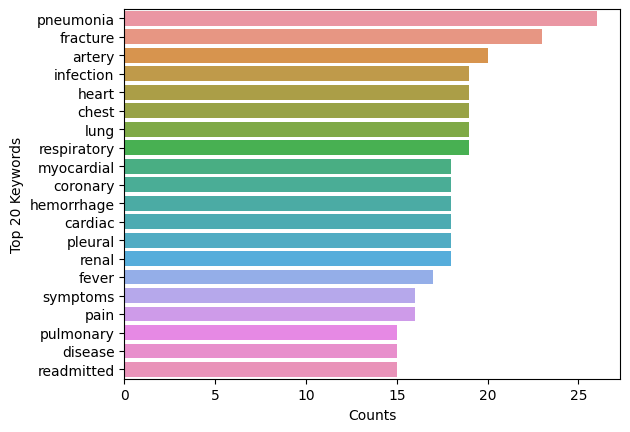

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.barplot(y, x = "counts", y = "keywords")
ax.set(xlabel = 'Counts', ylabel = 'Top 20 Keywords')
plt.show()

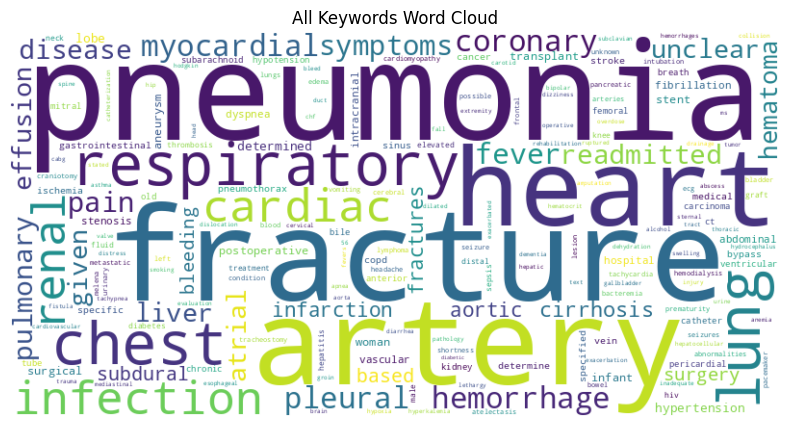

In [10]:
word_counts = Counter(final_list)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('All Keywords Word Cloud')
plt.show()

In [11]:
'''import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create a sample dataset
data = {'PatientID': range(1, 1001),
        'Keywords': [['heart', 'blood pressure', 'cholesterol', 'diabetes', 'exercise']]*250 +
                    [['headache', 'migraine', 'stress', 'sleep', 'medication']]*250 +
                    [['joint pain', 'arthritis', 'physical therapy', 'inflammation', 'exercise']]*250 +
                    [['asthma', 'lung capacity', 'allergies', 'smoking', 'medication']]*250}

df = pd.DataFrame(data)

# Convert the list of keywords to a string
df['Keywords_str'] = df['Keywords'].apply(lambda x: ' '.join(x))

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Keywords_str'])

# K-means clustering
num_clusters = 4  # You can adjust this based on your requirements
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Reduce dimensionality for visualization (you can adjust the number of components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Add the reduced dimensions to the DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title('Patient Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()
'''

"import pandas as pd\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.cluster import KMeans\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\n\n# Create a sample dataset\ndata = {'PatientID': range(1, 1001),\n        'Keywords': [['heart', 'blood pressure', 'cholesterol', 'diabetes', 'exercise']]*250 +\n                    [['headache', 'migraine', 'stress', 'sleep', 'medication']]*250 +\n                    [['joint pain', 'arthritis', 'physical therapy', 'inflammation', 'exercise']]*250 +\n                    [['asthma', 'lung capacity', 'allergies', 'smoking', 'medication']]*250}\n\ndf = pd.DataFrame(data)\n\n# Convert the list of keywords to a string\ndf['Keywords_str'] = df['Keywords'].apply(lambda x: ' '.join(x))\n\n# TF-IDF vectorization\nvectorizer = TfidfVectorizer()\nX = vectorizer.fit_transform(df['Keywords_str'])\n\n# K-means clustering\nnum_clusters = 4  # You can adjust this based on your requirements\nkmeans = KMeans(n_clu